## Logistic Regression 

Importing important libraries and modules. 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 


Defining the utility function called plot_confusion_matrix for displaying the confusion matrix in a nice UI.

In [2]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation ='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Defining the utility function called show_data for displaying precision, recall and accuracy from the confusion matrix.

In [3]:
def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision    =  {:.5f}'.format(tp / (tp + fp)))
        print('Recall (TPR) =  {:.5f}'.format(tp / (tp + fn)))
        print('Accuracy     =  {:.5f}'.format((tp + tn) / (tp + tn + fp + fn)))
    return tp / (tp + fp), tp / (tp + fn), (tp + tn) / (tp + tn + fp + fn) 

K-Fold Cross validating 

In [13]:
def kfold_wrapper(X_train, y_train):    
    c_params = [0.01,0.1,1,10,100]
    list_mean_recall = []
    kf = KFold(n_splits=5)
    #print(list(train_index))
    for c in c_params:
        print("-"*50)
        print("C Parameter: ", c)
        itr = 1
        recall_accs = []
        for train_index, val_index in kf.split(X_train):
            lr = LogisticRegression(C = c, penalty = 'l1')
            lr.fit(X_train.iloc[train_index],y_train.iloc[train_index])
            y_pred_undersample = lr.predict(X_train.iloc[val_index])
            recall_acc = recall_score(y_train.iloc[val_index],y_pred_undersample)
            recall_accs.append(recall_acc)
            print("Iteration: ",itr, " Recall Score: ", recall_acc)
            itr+=1
        mean_recall = np.mean(recall_accs)
        print("Mean Recall Score: ", mean_recall)
        list_mean_recall.append(mean_recall)
    recall_c = pd.DataFrame({'c':c_params, 'mean_recall':list_mean_recall})
    display(recall_c)
    best_cparam = recall_c.iloc[recall_c.idxmax()['mean_recall']]['c']
    print("Best C Parameter: ", best_cparam)
    return best_cparam

Loading data from csv file to the dataframe. Extracting fraud records from it. 

In [4]:
df = pd.read_csv('https://people.rit.edu/~hvp4259/project/data/creditcard.csv')
fraud = df[df['Class'].isin([1])]
X_fraud = fraud[fraud.columns[0:30]]
Y_fraud = fraud[fraud.columns[30]]
print(X_fraud.shape)
print(Y_fraud.shape)

(492, 30)
(492,)


Examining the shape of the dataframe in order to check if all the instances are loaded correctly or not. 

In [5]:
df.shape

(284807, 31)

Splitting the data between test and training data. Also checking the shape for trainign features and test features. 

In [6]:
X, Xt, Y, Yt = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.10, random_state=10)

In [7]:
X.shape

(256326, 30)

In [8]:
Xt.shape

(28481, 30)

Training the model and applying logistic regression with constatnt of regulization being 0.01 and penatly norms being l2. 

In [20]:
best_c_param = kfold_wrapper(X, Y)

--------------------------------------------------
C Parameter:  0.01
Iteration:  1  Recall Score:  0.529411764706
Iteration:  2  Recall Score:  0.602272727273
Iteration:  3  Recall Score:  0.471153846154
Iteration:  4  Recall Score:  0.55
Iteration:  5  Recall Score:  0.586206896552
Mean Recall Score:  0.547809046937
--------------------------------------------------
C Parameter:  0.1
Iteration:  1  Recall Score:  0.611764705882
Iteration:  2  Recall Score:  0.613636363636
Iteration:  3  Recall Score:  0.528846153846
Iteration:  4  Recall Score:  0.675
Iteration:  5  Recall Score:  0.655172413793
Mean Recall Score:  0.616883927432
--------------------------------------------------
C Parameter:  1
Iteration:  1  Recall Score:  0.623529411765
Iteration:  2  Recall Score:  0.636363636364
Iteration:  3  Recall Score:  0.538461538462
Iteration:  4  Recall Score:  0.675
Iteration:  5  Recall Score:  0.712643678161
Mean Recall Score:  0.63719965295
-------------------------------------------

,c,mean_recall
0,0.01,0.547809
1,0.10,0.616884
2,1.00,0.637200
3,10.00,0.638895
4,100.00,0.638895


Best C Parameter:  10.0


In [21]:
model = LogisticRegression(C = best_c_param, penalty = 'l1')
model.fit(X, Y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Applying the model on test data and ploting the congusion matrix. 

[[255845     37]
 [   163    281]]


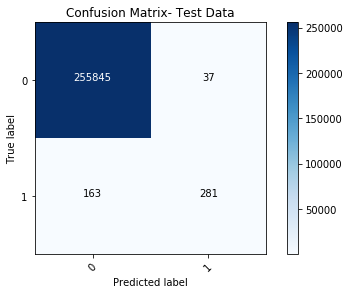

Precision    =  0.88365
Recall (TPR) =  0.63288
Accuracy     =  0.99922


In [22]:
y_pred = model.predict(X)
cm = confusion_matrix(Y, y_pred)
print(cm)
plot_confusion_matrix(cm, ['0', '1'], title = 'Confusion Matrix- Test Data')
pr, tpr, acc = show_data(cm, print_res = 1);

Applying the model on fraud data only and ploting the congusion matrix. 

[[  0   0]
 [180 312]]


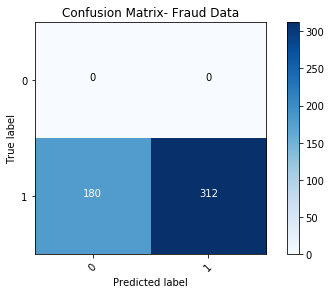

Precision    =  1.00000
Recall (TPR) =  0.63415
Accuracy     =  0.63415


In [23]:
y_pred = model.predict(X_fraud)
cm = confusion_matrix(Y_fraud, y_pred)
print(cm)
plot_confusion_matrix(cm, ['0', '1'], title = 'Confusion Matrix- Fraud Data')
pr, tpr, acc = show_data(cm, print_res = 1);

Applying the model on entire dataset and plotting the confusion matrix. 

[[284272     43]
 [   180    312]]


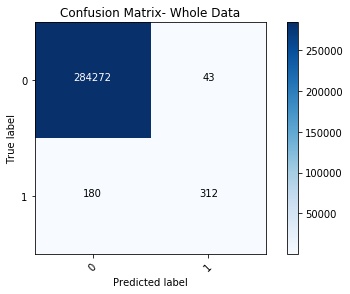

Precision    =  0.87887
Recall (TPR) =  0.63415
Accuracy     =  0.99922


In [24]:
y_pred = model.predict(df[df.columns[0:30]])
cm = confusion_matrix(df[df.columns[30]], y_pred)
print(cm)
plot_confusion_matrix(cm, ['0', '1'], title = 'Confusion Matrix- Whole Data')
pr, tpr, acc = show_data(cm, print_res = 1);